In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Melihat ada 50000 gambar data training dan 10000 gambar data test

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train adalah 2D array, untuk klasifikasi menjadi 1D array yang akan lebih baik , sehingga lakukan konversikan menjadi 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["pesawat","mobil","burung","kucing","rusa","anjing","katak","kuda","kapallaut","truck"]

melakukan plot beberapa gambar

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

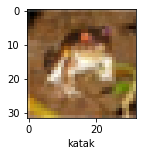

In [10]:
plot_sample(X_train, y_train, 0)

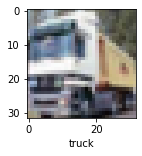

In [11]:
plot_sample(X_train, y_train, 1)

Menormalkan gambar menjadi angka dari 0 hingga 1. Gambar memiliki 3 saluran (R,G,B) dan setiap nilai dalam saluran dapat berkisar dari 0 hingga 255. Oleh karena itu untuk menormalkan dalam rentang 0-->1, kita perlu membagi itu dengan 255

<h4 style="color:purple">Menormalkan training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Membuat simple artificial neural network untuk klasifikasi gambar</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 266s 169ms/step - loss: 1.8145 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 265s 170ms/step - loss: 1.6216 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 270s 173ms/step - loss: 1.5378 - accuracy: 0.4589
Epoch 4/5
1563/1563 [==============================] - 275s 176ms/step - loss: 1.4787 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 259s 166ms/step - loss: 1.4287 - accuracy: 0.4977


**Sehingga dapat melihat bahwa pada akhir 5 epoch, akurasinya sekitar 0.4977**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.48      0.55      1000
           1       0.60      0.63      0.61      1000
           2       0.50      0.16      0.24      1000
           3       0.38      0.25      0.31      1000
           4       0.44      0.41      0.42      1000
           5       0.38      0.40      0.39      1000
           6       0.38      0.77      0.51      1000
           7       0.54      0.58      0.56      1000
           8       0.64      0.61      0.63      1000
           9       0.52      0.62      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



<h4 style="color:purple">Membuat convolutional neural network untuk gambar train</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 155s 98ms/step - loss: 1.4382 - accuracy: 0.4866
Epoch 2/10
1563/1563 [==============================] - 135s 87ms/step - loss: 1.0879 - accuracy: 0.6192s - loss: 1.088
Epoch 3/10
1563/1563 [==============================] - 168s 107ms/step - loss: 0.9546 - accuracy: 0.6672 -
Epoch 4/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.8680 - accuracy: 0.7009
Epoch 5/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.7929 - accuracy: 0.7244
Epoch 6/10
1563/1563 [==============================] - 154s 98ms/step - loss: 0.7342 - accuracy: 0.7436
Epoch 7/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.6776 - accuracy: 0.7633
Epoch 8/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.6355 - accuracy: 0.7779
Epoch 9/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.5903 - accuracy: 0.7935
Epoch 10/10
1563/1563 [==========

**Dengan CNN, pada akhir 5 epochs, accuracy meningkat sekitar 0.7244 dengan significant . CNN adalah yang terbaik untuk classificasi gambar dan memberikan akurasi yang luar biasa, sehingga perhitungannya jauh lebih mudah dibanting dengan JST, sederhana karena maxpooling mengurangi dimensi gambar sambil tetap mempertahankan fitur**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 10s 29ms/step - loss: 0.9425 - accuracy: 0.6952


[0.9424939155578613, 0.6952000260353088]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.20572057e-04, 3.04830064e-05, 1.48900610e-03, 9.84153807e-01,
        5.26739541e-06, 1.18205044e-02, 1.47943691e-04, 5.63146671e-07,
        2.03188648e-03, 1.01720445e-08],
       [6.81679742e-03, 3.88600789e-02, 6.36196887e-07, 1.34029403e-06,
        3.68184372e-10, 3.30011609e-08, 2.19400434e-07, 2.38401549e-10,
        9.54102576e-01, 2.18322108e-04],
       [3.91693041e-02, 3.33925299e-02, 4.15753108e-03, 3.92454490e-02,
        2.36694096e-03, 4.84860921e-03, 1.53796247e-03, 1.03183242e-03,
        8.21012497e-01, 5.32373637e-02],
       [9.86926436e-01, 4.08018794e-04, 9.67001077e-04, 1.98149309e-03,
        1.08690665e-03, 2.03482050e-05, 2.26000833e-04, 5.86301358e-05,
        8.17508623e-03, 1.50091408e-04],
       [7.55811982e-07, 7.13131669e-07, 1.23498344e-03, 1.42801866e-01,
        7.72910357e-01, 3.29184136e-03, 7.97534138e-02, 6.72470890e-07,
        5.31121987e-06, 1.44057438e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

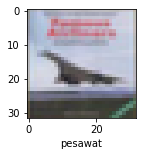

In [31]:
plot_sample(X_test, y_test,3)

In [32]:
classes[y_classes[3]]

'pesawat'

In [33]:
classes[y_classes[3]]

'pesawat'